In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Importing the dataset
dataset = pd.read_csv('mnist_train.csv')
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [4]:
# Checking the dataset
dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


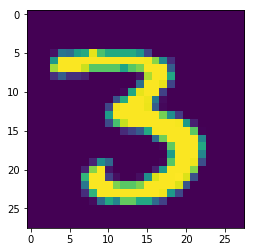

In [19]:
# Taking a sample data from the dataset and checking it
sample = dataset.iloc[12,1:].values
sample = sample.reshape(28,28).astype('uint8')
plt.imshow(sample)

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [21]:
# Fitting the Regression to the dataset
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
# Predicting the result using Random Forest Classifer
y_pred = regressor.predict(X_test)

In [23]:
# Creating confusion matrix to evaluate the accuracy of prediction
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Checking the confusion matrix
cm

array([[1178,    0,    4,    0,    0,    2,    5,    1,    7,    0],
       [   0, 1322,    9,    2,    5,    1,    0,    3,    0,    0],
       [  15,    5, 1166,   14,   13,    1,    4,   13,   11,    3],
       [   4,    3,   25, 1128,    0,   23,    6,   13,   17,    6],
       [   3,    4,    3,    3, 1075,    2,    7,    3,    6,   20],
       [   4,    2,    6,   43,    5,  994,   13,    0,   11,   10],
       [  14,    3,    4,    1,    3,   15, 1125,    0,    7,    0],
       [   3,   10,   13,    7,   10,    3,    1, 1213,    3,   17],
       [   5,    8,   21,   25,    8,   16,    7,    3, 1058,   17],
       [   7,    5,    5,    6,   35,    6,    4,   13,   11, 1065]],
      dtype=int64)

In [24]:
# Checking the accuracy of the prediction
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9436666666666667